<a href="https://colab.research.google.com/github/knobs-dials/wetsuite-dev/blob/main/notebooks/extras/extras_methods_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (only) in colab, run this first to install wetsuite from (the most recent) source.   For your own setup, see wetsuite's install guidelines.
!pip3 install -U --no-cache-dir --quiet https://github.com/knobs-dials/wetsuite-dev/archive/refs/heads/main.zip

## Purpose of this notebook

Explain when and why you may need to resort to OCR to get textual data -- and when you may not need to go that far.

Also, we give an example of one package to do OCR with.

### Context on government data

**Government gives a decent version of what it has. What that _is_ depends on context**

For context: There are best-effort obligations that say that varied government data be available in a machine-readable form where possible.
While sometimes that means a near-data form, the document types that are there lie on a gliding scale - it might also be an office-document form, PDF, or some combination of the above.

The structured data is generally our preference to work with - but some things are only available as PDF.

### Context on PDFs

**PDFs don't necessarily contain text, or good text**

PDFs _in genera_ are not a document format.

In the widest sense, PDF only need to _draw_ a document,
whether that be on a screen or on a piece of paper.



Whether it also contains a _text_ version of the text it is drawing will depend.

Yes, PDF/A (for archiving) and PDF/UA (Universal Accessibility) basically does
make it the responsibility of who/what created the PDF to contain text.
But few of the government PDFs _are_ PDF/A or PDF/UA. 
And it would still not guarantee polished natural flowing text.


In general, how clean that text is varies significantly.
Beyond 'just garbled' is a grab-bag of 'close buit not quite' cases from visually close (e.g. O versus 0)
to "B e s c h ik k in g va n de M in is te r van J u s titie" which is ''all'' the right _characters_,
but the spaces still make it really had to use.

Or placed in a natural reading order, a separate problem.





Yes, when that PDF comes from structured data, via browser forms, or office documents, 
it will typically contain text, and that text will be quite clean.

If not, but someone somewhere looked at those best-effort rules and applied OCR,
there will be text, but it may be messy.

If it comes from the scanner down the hall, it contains to text - just pictures of text.

In the last case - possibly the last two - we may wish to turn PDFs to text ourselves.

**PDF to text as a product?**

Keep in mind that there are varied products and services out there that offer a
"put document-like things here, we make it easy to search", e.g. document managers 
such as [documentcloud](https://www.documentcloud.org/app) (TODO: list more).

- When these apply to your projects, they may be much lower-worry _and_ may
  scale better than figuring this out yourself.

- Some are meant for publication (so not necessarily an option when your data is not public),
  others not so much (e.g. aimed at journalists who want to wade through a mass of documents sent to them).

- Few give you much control over results quality, though, so the below is an example of doing it yourself,
  and there is a more complex example linked below (right after an example of why you might want that).


## Note on perfectionism

** Layout in PDF text and/or OCR**

In some ways, both embedded PDF text and OCR output are very similar:
they say "in this box, this text existed". 

No layout information, just text next to other text.  Even if the text is perfectly accurate to what it said originally,
you still can't necessarily say anything about the document, headers, footers, double columns, etc.

Is that text in what you might call natural reading order? 
Depends.

If you care about that, you will have to do that yourself, or find code that does.


***Think about how much you need it.***

How much work there is to be done depends on what you're doing wit the output.

If you're only detecting the presence of words, 
e.g. to find documents them by contents,
then text objects of any sort will already go a long way,
and a few lines of code are all you need.

If you want perfectly natural flowing text, you will need to do a little more
<!--

# Dealing with PDFs

## PDFs can be messy

While you may think of PDFs as structured text documents, they aren't that.
Somestimes yes, sometimes no.

They mostly just specify how to draw things. PDFs consists of a stream of objects,
that often but not necessarily ''includes'' "by the way, the text we are drawing says this".


Even if we we can get out that text fairly easily, the more general nature of this PDF stream 
still makes things a little messier than you would think. 

There is quite a bit of variation of what documents contain, and how they contain it:
* When it comes from a word processor, it'll have good text.

* If it comes from scanned images or such, it may have no text objects at all,
  in which case your only option is your own OCR.

* Scanned images may also have some OCRed text added afterwards, which is a still a great start but may be imperfect in multiple ways.

* There are also some cases where it seems to show text perfectly, but there are some internals
  that mean it would not copy/exctract text correctly.
  That _also_ means we need to fall back to your own OCR.



## More practically

One of the first things we can do fairly easily is detect the "PDF has no text at all" case.

...though we should maybe do that per page, because it turns out there are plen  there are plenty of cases where PDFs are different things appended,
and it's a mix of perfectly good text, and later just images of text.

In mixed datasets, you might consider to OCR everything, if only because while that gives you more data to polish, it is at least more uniform.


If you're studying the sentences in there, you may need to take more care.
And that might be simpler on a specific subset of documents, 
for simple reasons reasons like they come from the same template so are easier to clean up.
-->



## What we should probably give you

- determining whether a PDF contains text

- to extract text from PDFs if we can

- to OCR it where we cannot

- to polish the output of OCR, if that is reasonable

  - Code doing various of those things was necessary for one of our pilot projects,
    and while it is specific-purpose and not central to our project,
    it might be a nice start for someone else.


<!--
Note that the PDF functions are actually a thin wrapper around a PDF library, currently PyMuPDF.
If you are interested in the details, consider using its code directly,
after reading its documentation - it's pretty good.

https://pymupdf.readthedocs.io/en/latest/app1.html


OCR is likelier to be changeable - a lot of classic OCR had issues that might be manageable
but patchup doesn't scale to millions
-->

<!--

## Potentials

And you will have to polish it _anyway_ if you want to be able to do things like 
* layouting - regular word-style documents can have text fragments appended based on coordinates, but e.g. multiple columns take more care
* recognize characters OCR got wrong (particularly structural mistakes we could fix automatically)
* recognize too many or too few spaces (e.g. coming from kerning details)
* combine fragments into sentences, 
* separating paragraphs,
* recognizing and separating/removing headers and footers
* recognize hyphenation between sentences
* recognize and extract tables


When the input is OCR, all of that needs to be done from fragments of text and their positions.

It's one of those problems where it's relative easy to get 80% of the way, 
and the last few percents are a pain.

Ideally, we have an easy way to verify, score, and fix OCR output.

This may involve storing
* Page images (rendered PDF, pre-OCR)
* raw output: fragments with positions
* raw output with metadata e.g. 'probably header'
* plain text with layouting like the original 
* text with




## To look at

* pdftotext (part of Xpdf and Poppler)
  * command line tool, extracts text and considers layouting 

* PDFMiner 
  * TODO: look at

* PyPDF2
  * parses object structure and can extract text. Documentation suggests it is currently relatiely basic.

* unpaper
  * prepares image for OCR, e.g. removing shadow corners common in photographs
  * https://github.com/unpaper/unpaper

* https://pypi.org/project/dehyphen/
  * an its use of perpexity? (and flairNLP?) 

* pytesseract
  * TODO: look at

* TICCL (Text-Induced Corpus Clean-up) / PICCL
  * Statistical word corrector based on a corpus
  * TODO: look at
  https://github.com/LanguageMachines/PICCL

* https://github.com/proycon/tscan


## Unsorted

https://www.clarin.eu/resource-families/tools-normalisation


-->

This is provided in part as expectation management about 
  ease of use and output quality of modern OCR.

Keep in mind that OCR is not considered core feature, 
  is currently a thin wrapper around something else,
  and is likely to change in the future (e.g. tesseract may be more future-compatible than easyocr).
  Also consider that services like google vision are better-quality, but paid-for and may not be GDPR-compatible, etc. A summary of such details may be useful.

## Getting to some code examples

In [1]:
import wetsuite.helpers.net
import wetsuite.helpers.format
import wetsuite.extras.pdf
import wetsuite.extras.ocr

### Notice and decide that we need OCR

In [2]:
# fetch a cherry-picked example PDF file
example_pdf_bytes = wetsuite.helpers.net.download('https://open.overheid.nl/documenten/ronl-5439f4bf9849a53e634389ebbb5e4f5740c4f84f/pdf')

In [3]:
# Extract text from PDF

pages_text = list(  wetsuite.extras.pdf.page_text( example_pdf_bytes )  )
for page_text in pages_text:
    print( '#################################################################' )
    print( page_text.strip() )



#################################################################
> Retouradres Postbus 40219 8004 DE Zwolle 
  
 
 
 
Rijksdienst voor 
Ondernemend Nederland 
Vergunningen en handhaving 
  
Mandemaat 3, Assen 
Postbus 40219 
8004 DE Zwolle 
www.rvo.nl 
 
Contactpersoon 
 
Woo-medewerker 
  
T 0880 42 4242 
woo-unit@rvo.nl 
    
Onze referentie 
Woo/2023/035 
 
Datum 29 maart 2023 
Betreft Beslissing op verzoek Woo/2023/035 
 
Bijlagen 
2 
Relatienummer 
 
  
  
  
  
  
 
 
 
 
 
 
 
 
 
 
Geachte heer 
, 
 
 
 
Op 15 februari 2023 heb ik uw verzoek ontvangen waarin u vraagt om 
openbaarmaking van informatie. In deze brief leest u mijn reactie op uw verzoek. 
 
Uw verzoek 
U vraagt om openbaarmaking van informatie over de definitieve 
investeringsverklaring(en) verleend in verband met de verbouw van 220 woningen 
met projectnummer RVVN200264. 
 
Procedure 
De ontvangst van uw verzoek is schriftelijk bevestigd bij brief van  
17 februari 2023 met kenmerk Woo/2023/035. In deze brief is 

Looks like text, right?

Yes, but notice what happened there at te end.
There seem to be empty pages.

It turns out this is a PDF with two sections-of-sorts: seven pages of document with hundreds of words per page, 
and then proably a buch of scanned pages without an according PDF text layer.

Another way to check/estimate such shortcomings:

In [11]:
chars_per_page, num_pages_with_text, num_pages = wetsuite.extras.pdf.count_pages_with_text(example_pdf_bytes, char_threshold=200)

print( f'Characters per page: {chars_per_page}\n' )
print( f'So {num_pages_with_text} out of {num_pages} pages contain reasonable amount of text')

Characters per page: [1612, 2797, 816, 643, 2479, 2684, 481, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

So 11 out of 20 pages contain reasonable amount of text


### Go the other way: PDF to image, image to text

OCR takes images as input, so now we want the PDF as images.

We _could_ skip the pages we alreay have text for and save some processing time,
but it's less _code_ (though more analysis time) to see what it makes of the pages we do have text for. 

(It's also potentially a good double-check of the OCR to see that the PDF's text matches what OCR extracts)

In [12]:
page_images = list( wetsuite.extras.pdf.pages_as_images(example_pdf_bytes, dpi=200) )
# Note: in general you should do this one at a time, generator-style, or a 300-page document will make your computer cry via large amounts of memory use.
# In this case, that list() rendering all before we continue is fine, and should take a few seconds.

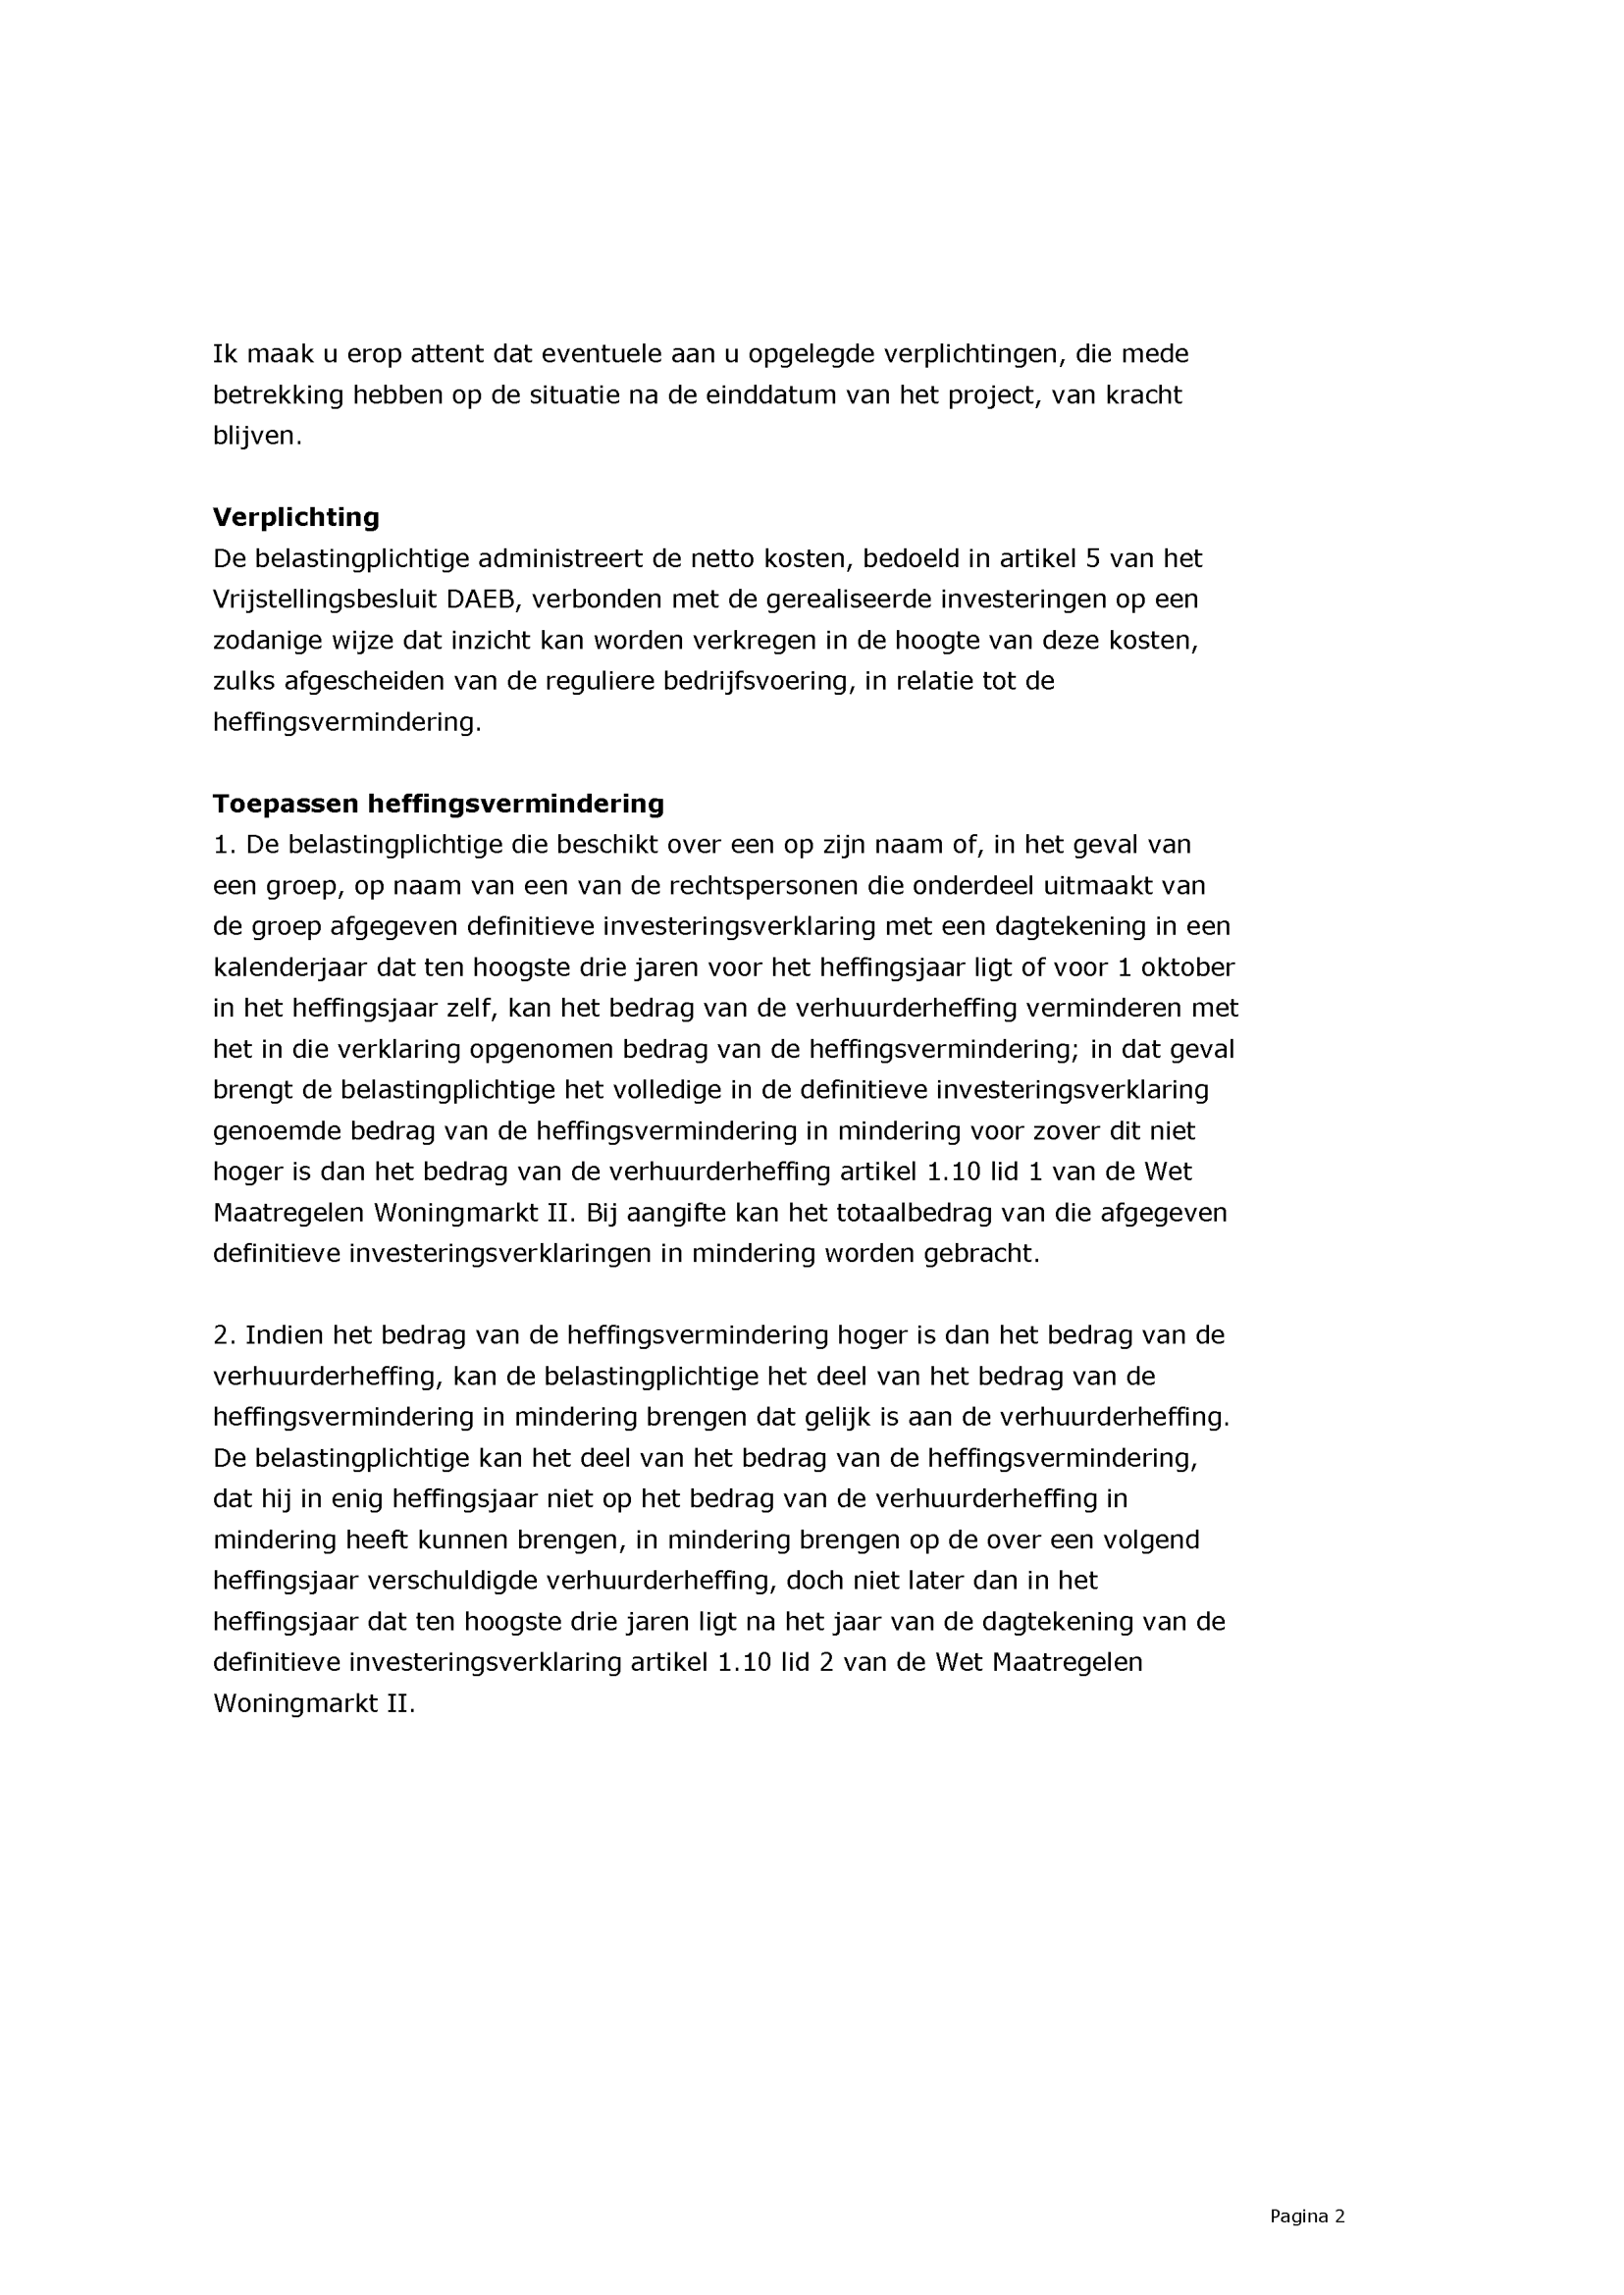

In [13]:
# show us the second page we didn't get text for
#   (notebooks treat PIL images by showing them. In practice you might .save() them instead)
chosen_example_image = page_images[8]
chosen_example_image   

In [14]:
page_ocr_results = wetsuite.extras.ocr.easyocr( chosen_example_image, use_gpu=True ) 
# if GPU fails, use False,  though it'll be slower.
#  Even on GPU it'll take a minute, and despite that _some_ of that is initial loading,
#     the same on CPU will probably take a few times as long.

first use of ocr() - loading EasyOCR model (into GPU)
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [24]:
# what did that produce?
page_ocr_results

[([(213, 343), (1217, 343), (1217, 383), (213, 383)],
  'Ik maak u erop attent dat eventuele aan u opgelegde verplichtingen, die mede',
  0.6823283176928038),
 ([(212, 383), (1211, 383), (1211, 423), (212, 423)],
  'betrekking hebben op de situatie na de einddatum van het project, van kracht',
  0.7366969956685622),
 ([(214, 430), (308, 430), (308, 462), (214, 462)],
  'blijven.',
  0.970737011570096),
 ([(214, 508), (391, 508), (391, 549), (214, 549)],
  'Verplichting',
  0.988003375277293),
 ([(215, 553), (1233, 553), (1233, 591), (215, 591)],
  'De belastingplichtige administreert de netto kosten, bedoeld in artikel 5 van het',
  0.6219529329008259),
 ([(213, 591), (1225, 591), (1225, 632), (213, 632)],
  'Vrijstellingsbesluit DAEB, verbonden met de gerealiseerde investeringen op een',
  0.7856826090511339),
 ([(213, 635), (1227, 635), (1227, 674), (213, 674)],
  'zodanige wijze dat inzicht kan worden verkregen in de hoogte van deze kosten,',
  0.7137132163974219),
 ([(213, 675), (1

That's OCR results in relatively raw form, namely fragments of:
- the bounds of the box that contains this fragment of text
- the text detected inside that box
- how certain the underlying code was about the detection of this text

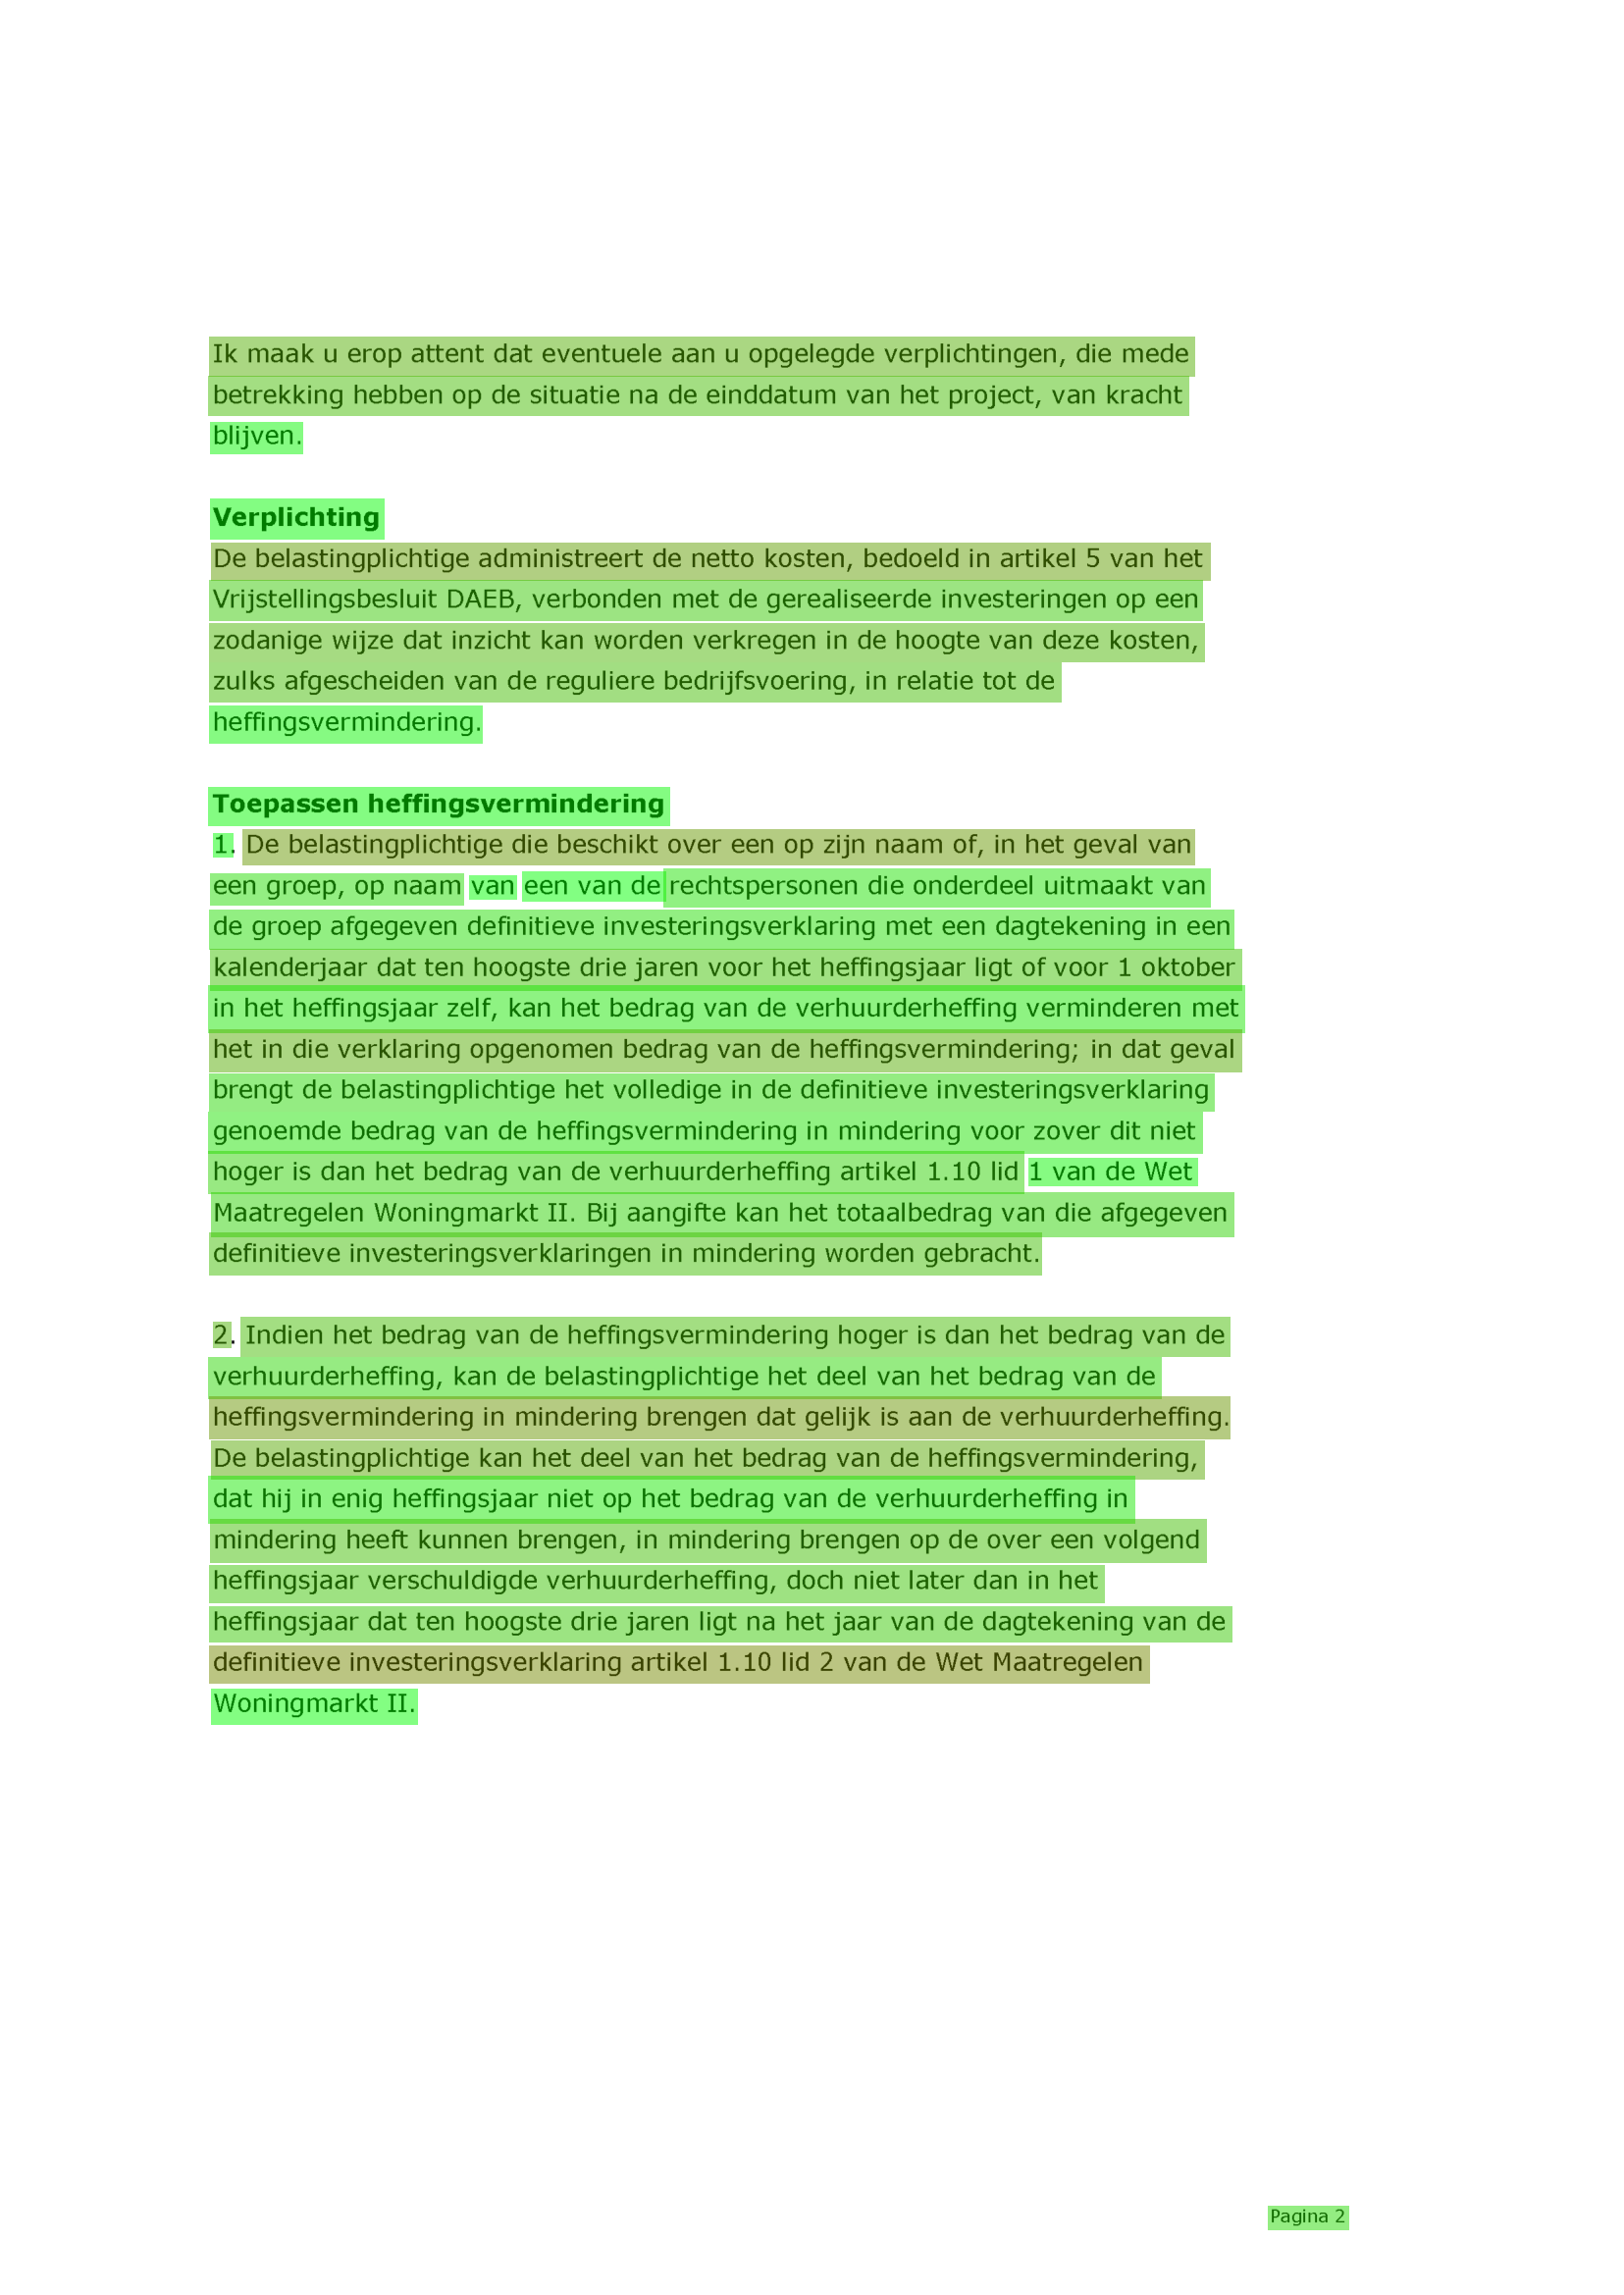

In [25]:
# As a double-check, we can draw those bounding boxes on the original image,
#   with color indicating that mentioned certainty. 
# This doesn't allow us to check the extracted text against the image text,
#   but it does usually highlight areas of confusion. 
wetsuite.extras.ocr.easyocr_draw_eval( chosen_example_image, page_ocr_results ) 

In [26]:
# If you only really care about the words on the page (e.g. for bag-of-words methods),
# then you can get away with just taking out the text, e.g.
page_text = '\n'.join( list( text    for bbox, text, cert in page_ocr_results) )
print( page_text )

Ik maak u erop attent dat eventuele aan u opgelegde verplichtingen, die mede
betrekking hebben op de situatie na de einddatum van het project, van kracht
blijven.
Verplichting
De belastingplichtige administreert de netto kosten, bedoeld in artikel 5 van het
Vrijstellingsbesluit DAEB, verbonden met de gerealiseerde investeringen op een
zodanige wijze dat inzicht kan worden verkregen in de hoogte van deze kosten,
zulks afgescheiden van de reguliere bedrijfsvoering, in relatie tot de
heffingsvermindering.
Toepassen heffingsvermindering
1
De belastingplichtige die beschikt over een op zijn naam of, in het geval van
een groep, op naam
van
een van de
rechtspersonen die onderdeel uitmaakt van
de groep afgegeven definitieve investeringsverklaring met een dagtekening in een
kalenderjaar dat ten hoogste drie jaren voor het heffingsjaar ligt of voor 1 oktober
in het heffingsjaar zelf; kan het bedrag van de verhuurderheffing verminderen met
het in die verklaring opgenomen bedrag van de heffingsver

As you can see, it may fragment things acually on a single line,
it doesn't know how to separate paragraphs,
and it includes words that we would say are obviously header/footer rather than the body
(which can be a feature, but for large repeated headers is also messy)

Turning this into well-flowing text takes a lot more care,
will always be a slightly creative process, 
and can be made to work better within document sets that have a consistent structure.

If you care to get into that, check out [datacollect_kansspelautoriteit.ipynb](datacollect_kansspelautoriteit.ipynb), though note it cares less about readability of the code and more about the data it produces.


----

### Choosing the functions to call.

Looking at those green boxes, you might imagine you can use the positioning to be smarter.
See e.g. the code in [dataset_kansspelautoriteit (notebook)](dataset_kansspelautoriteit.ipynb)
taking more time and care to get cleaner text, by excluding headers and footers,
and figuring out paragraphs splits by the presence of whitespace.


...but sometimes you just care to extract the fact that words are in there at all,
and less about nice interpretation, in which case:

In [ ]:
### Quick and dirty PDF-text

# just one call, returns just one string. 
#   Tells you there is any text in there, but not e.g. that most pages are empty.
print( wetsuite.extras.pdf.doc_text( example_pdf_bytes ) )

In [29]:
### Quick and dirty OCR

# If you do not want to spend the time thinking about sentence fragments and bounding boxes,
#   there is this function that does OCR (so expect it to take minutes)
#   then dumbly joins all fragments without caring about paragraphs or spacing or anything like that.
print( wetsuite.extras.pdf.pdf_text_ocr( example_pdf_bytes ) )

Rijksdienst voor Ondernemend Nederland Retouradres Postbus 40219 8004 DE Zwolle Rijksdienst voor Ondernemend Nederland Vergunningen en handhaving Mandemaat 3, Assen Postbus 40219 8004 DE Zwolle WWW.rvo.nl Contactpersoon Woo-medewerker 0880 42 4242 woo-unit@rvo.nl Onze referentie Datum 29 maart 2023 Woo/2023/035 Betreft   Beslissing op verzoek Woo/2023/035 Bijlagen Relatienummer Geachte heer Op 15 februari 2023 heb ik uw verzoek ontvangen waarin vraagt om openbaarmaking van informatie. In deze brief leest u mijn reactie op uw verzoek. Uw verzoek U vraagt om openbaarmaking van informatie over de definitieve investeringsverklaring(en) verleend in verband met de verbouw van 220 woningen met projectnummer RVVN200264_ Procedure De ontvangst van uw verzoek is schriftelijk bevestigd bij brief van 17 februari 2023 met kenmerk Woo/2023/035 In deze brief is tevens de beslistermijn met twee weken verdaagd. Op 24 februari 2023 is er een opschortingsbrief aan u verzonden in verband met de zienswijze

In [ ]:
# TODO: add the less quick and dirty variants

# More PDF and OCR examples

== kst-31700-VIII-77-b1.pdf ==
raad voor cultuur
RJ:
Schimmelpennincklaan
raad voor cultuur
postbus
raad voor cultuur
2506 AE Den
telefoon +31(0)7031066 86
fax +31(0)70 3614727
mail cultuur@cultuurn]
WWW
cultuur,nl
De minister Yan Onderwijs, Cultuur en Wetenschap
de beer d. RHA Plasterk
Postbus 16375
2500 BJ Den
datum: 3 december 2008
uw kenmerk: WJZ-71524(8235)
uw brief van:
povember 2008
ons kcnmerk:
2008,05106/2
onderwerp: Advies Beleidsregel aanwizing beschermde monumenten 2009
Gcachte heer Plasterk
In uw brief van
novcmber 2008 stelt u de
brengen over het
voor Cultuur in de gelegenheid advies uit
(bierna te noemen: de
~Beleidsrcgel
bescherde monumenten 2009
beleidsregel) .
Dc
beleidsregel geeft
aan het beleid dat u voorstaat
van
motumenten als beschermd
met
betrekking tot =
1988. De
monumcnt op grond van artikel 3 van de Monumentenwet
beleidsrcgel biedt mcer nuimte voor aanwijzing
monument dan de huidige
'beleidsregel
vân
monumenten als bescbermd
laatste is
tijdelijke aard
aanwijz

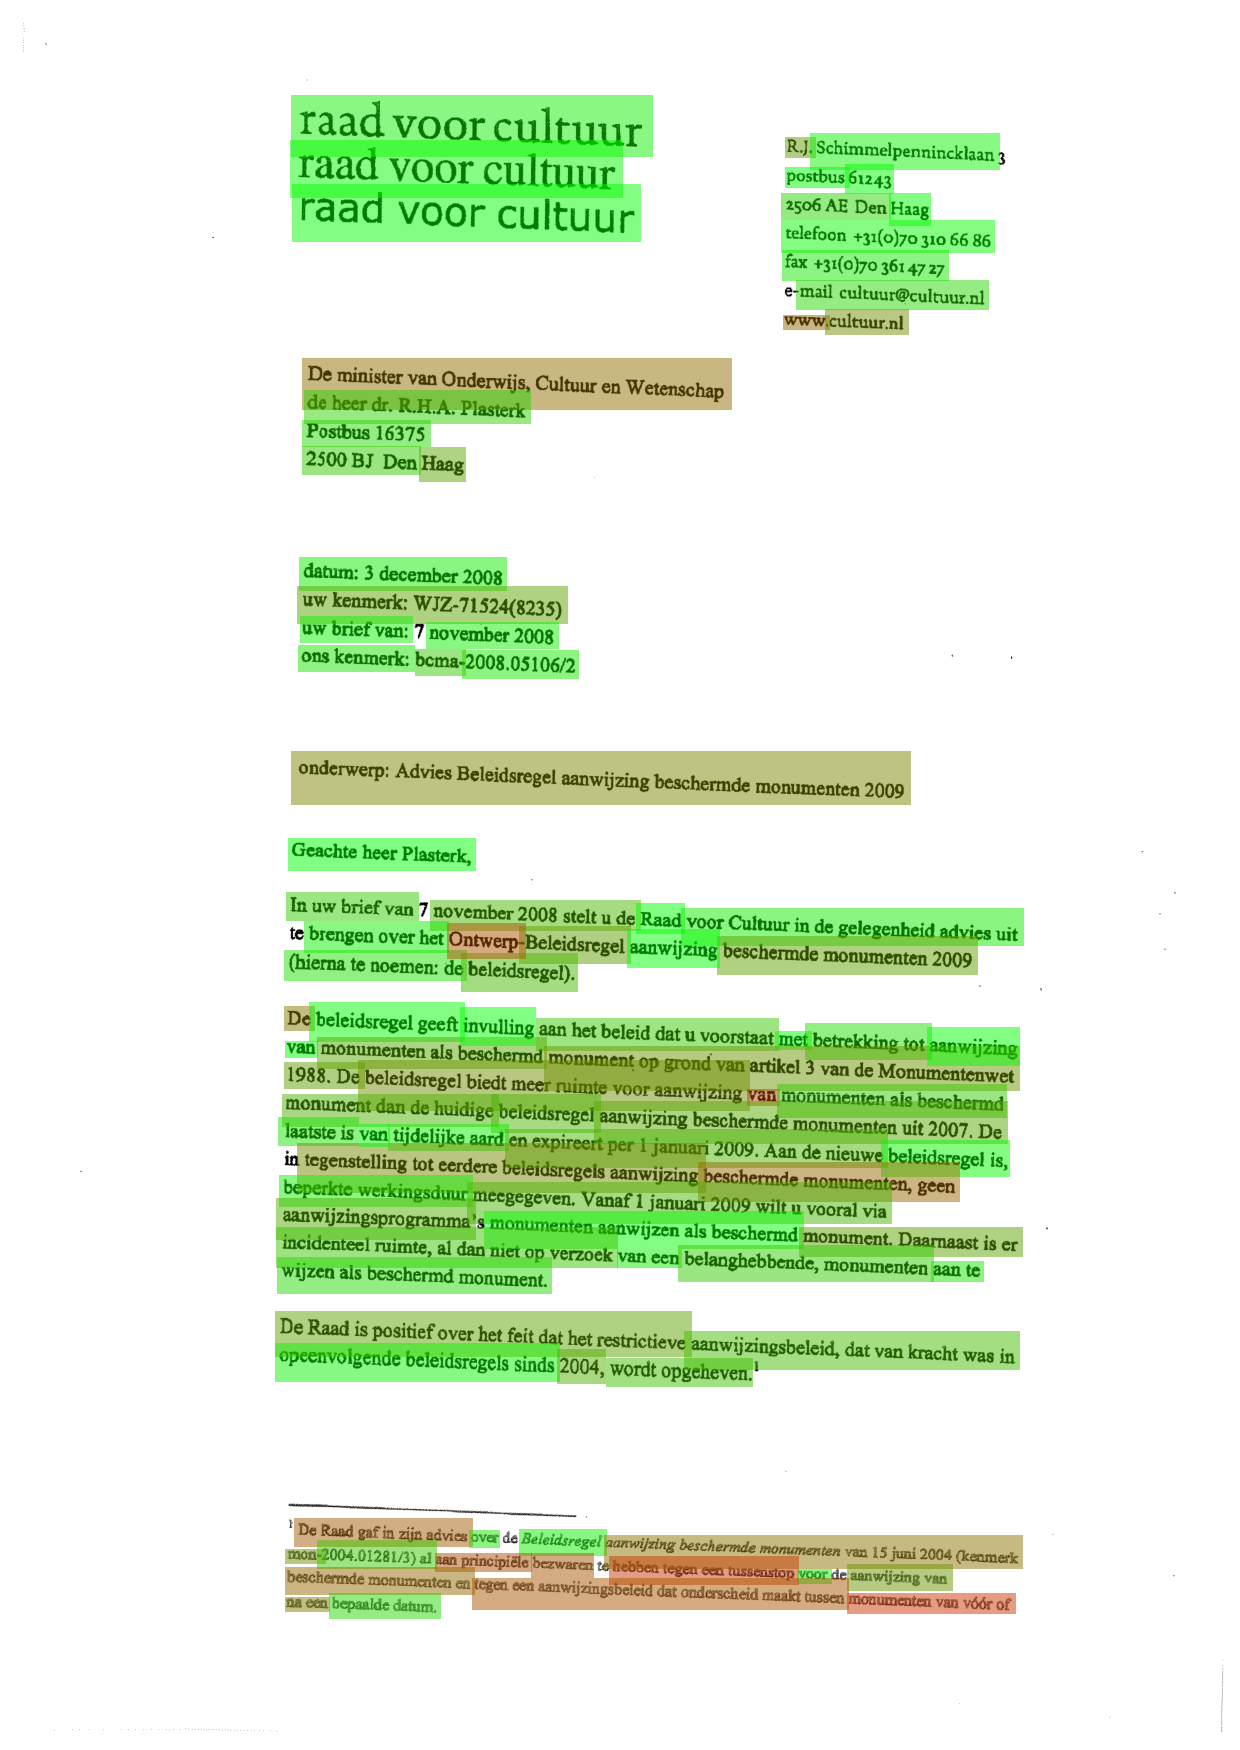

['raad voor cultuur', 'RJ:', 'Schimmelpennincklaan', 'raad voor cultuur', 'postbus', 'raad voor cultuur', '2506 AE Den', 'telefoon +31(0)7031066 86', 'fax +31(0)70 3614727', 'mail cultuur@cultuurn]', 'WWW', 'cultuur,nl', 'De minister Yan Onderwijs, Cultuur en Wetenschap', 'de beer d. RHA Plasterk', 'Postbus 16375', '2500 BJ Den', 'datum: 3 december 2008', 'uw kenmerk: WJZ-71524(8235)', 'uw brief van:', 'povember 2008', 'ons kcnmerk:', '2008,05106/2', 'onderwerp: Advies Beleidsregel aanwizing beschermde monumenten 2009', 'Gcachte heer Plasterk', 'In uw brief van', 'novcmber 2008 stelt u de', 'brengen over het', 'voor Cultuur in de gelegenheid advies uit', '(bierna te noemen: de', '~Beleidsrcgel', 'bescherde monumenten 2009', 'beleidsregel) .', 'Dc', 'beleidsregel geeft', 'aan het beleid dat u voorstaat', 'van', 'motumenten als beschermd', 'met', 'betrekking tot =', '1988. De', 'monumcnt op grond van artikel 3 van de Monumentenwet', 'beleidsrcgel biedt mcer nuimte voor aanwijzing', 'monu

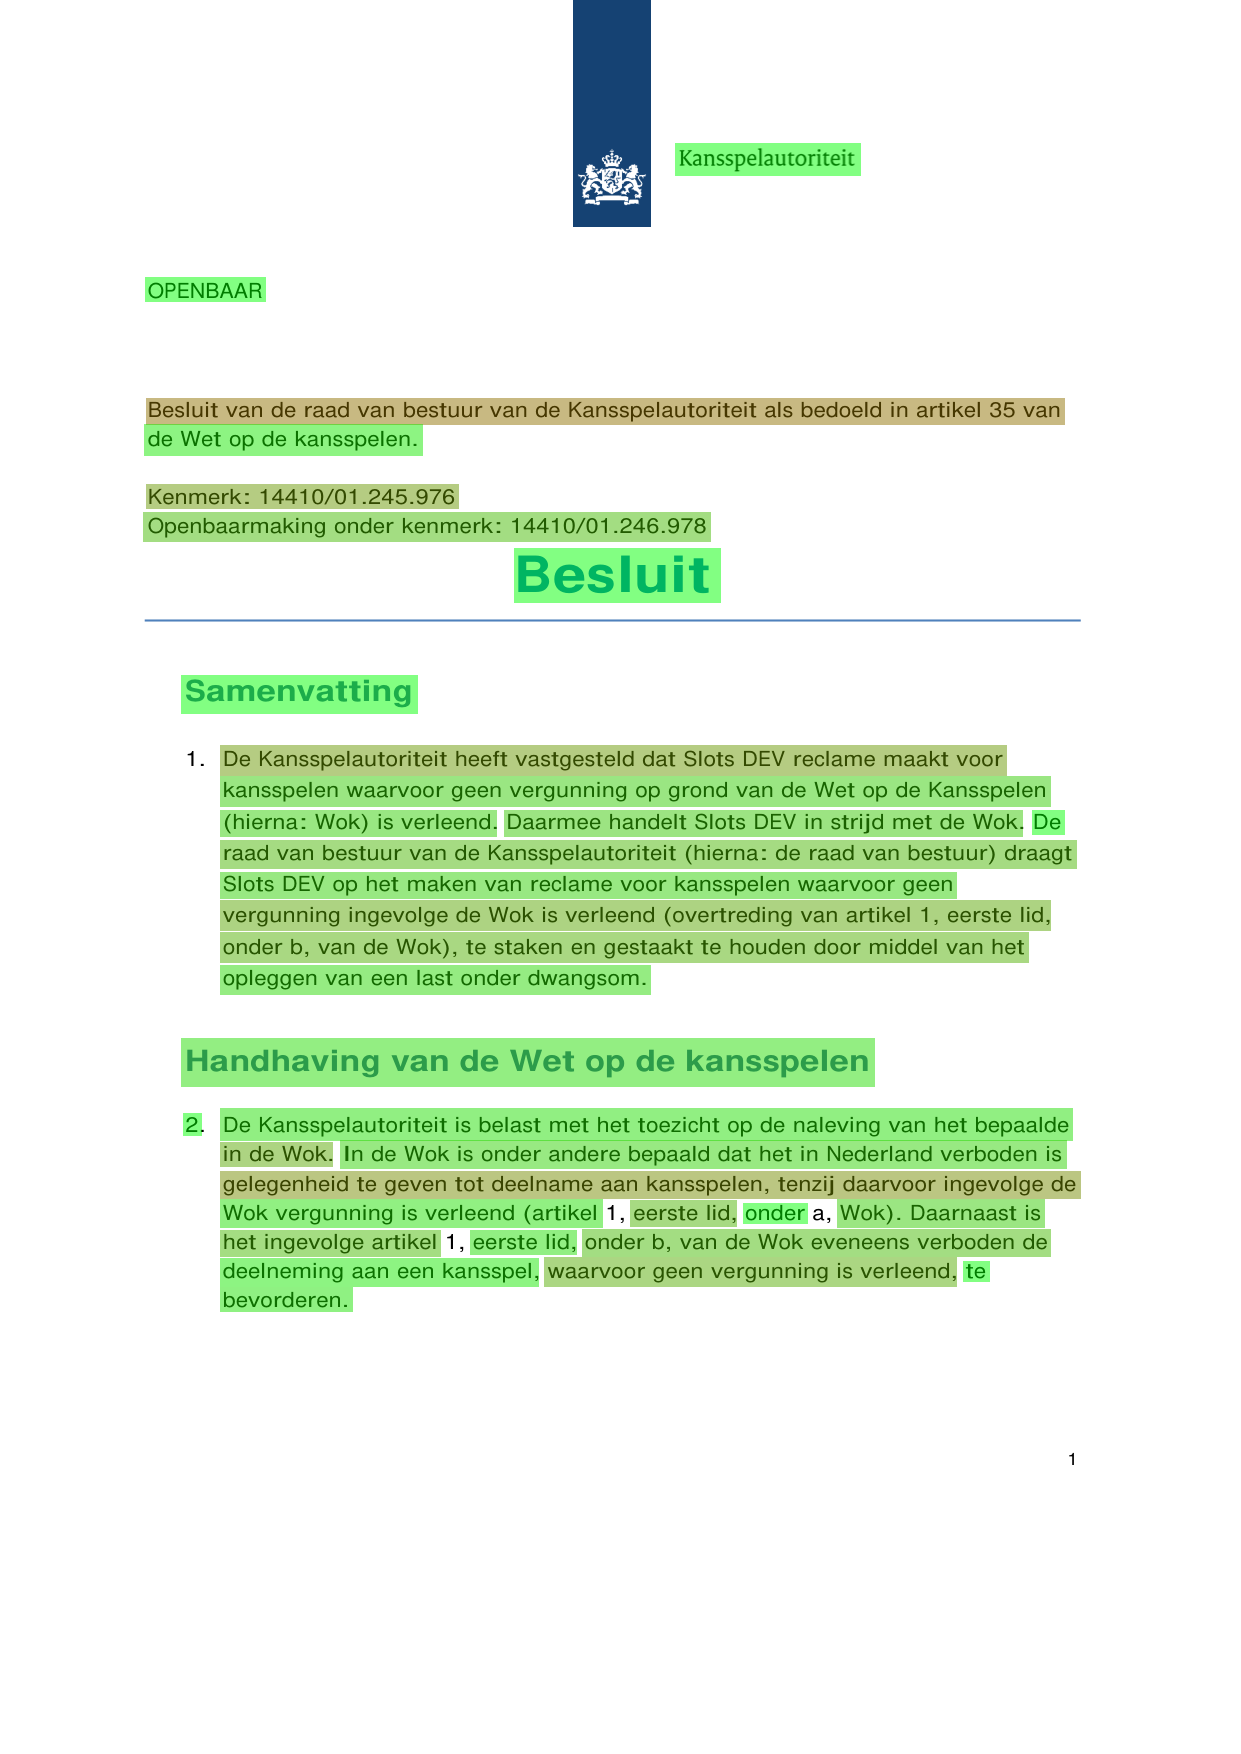

['Kansspelautoriteit', 'OPENBAAR', 'Besluit van de raad van bestuur van de Kansspelautoriteit als bedoeld in artikel 35 van', 'de Wet op de kansspelen.', 'Kenmerk: 14410/01.245.976', 'Openbaarmaking onder kenmerk: 14410/01.246.978', 'Besluit', 'Samenvatting', 'De Kansspelautoriteit heeft vastgesteld dat Slots DEV reclame maakt voor', 'kansspelen waarvoor geen vergunning op grond van de Wet op de Kansspelen', '(hierna: Wok) is verleend_', 'Daarmee handelt Slots DEV in strijd met de Wok', 'De', 'raad van bestuur van de Kansspelautoriteit (hierna: de raad van bestuur) draagt', 'Slots DEV op het maken van reclame voor kansspelen waarvoor geen', 'vergunning ingevolge de Wok is verleend (overtreding van artikel 1, eerste lid,', 'onder b, van de Wok) , te staken en gestaakt te houden door middel van het', 'opleggen van een last onder dwangsom.', 'Handhaving van de Wet op de kansspelen', '2', 'De Kansspelautoriteit is belast met het toezicht op de naleving van het bepaalde', 'in de Wok_', 'In 

In [30]:
import wetsuite.helpers.shellcolor as sc

test_urls = [
    'https://repository.overheid.nl/frbr/officielepublicaties/kst/31700-VIII/kst-31700-VIII-77-b1/1/pdf/kst-31700-VIII-77-b1.pdf', # non-straight image of text of not the best quality, that OCR makes a bunch of mistakes on

    'https://kansspelautoriteit.nl/publish/library/32/last_onder_dwangsom_slots_dev.pdf', # 1 page of text, the rest is images-of-text
    #'https://kansspelautoriteit.nl/publish/pages/5492/00_082_720_openbare_versie_last_onder_bestuursdwang.pdf', # 5 pages of images-of-text
    #'https://kansspelautoriteit.nl/publish/pages/5491/sanctiebesluit_wedwinkel.pdf', # 25 pages of images-of-text

    #'https://zoek.officielebekendmakingen.nl/trb-2022-72.pdf',
    #'https://zoek.officielebekendmakingen.nl/stb-2022-1.pdf',
    #'https://zoek.officielebekendmakingen.nl/stb-2000-5.pdf',
    #'https://zoek.officielebekendmakingen.nl/gmb-2022-385341.pdf',
    #'https://zoek.officielebekendmakingen.nl/stcrt-2019-42172.pdf',
    #'https://zoek.officielebekendmakingen.nl/prb-2022-10190.pdf',
    #'https://zoek.officielebekendmakingen.nl/wsb-2022-9718.pdf',
]

for url in test_urls:
    print( "== %s =="%wetsuite.helpers.format.url_basename( url ) )
    example_pdf_bytes = wetsuite.helpers.net.download(url)
    page_images = list( wetsuite.extras.pdf.pages_as_images(example_pdf_bytes) )

    for page_i, page_image in enumerate(page_images):
        #page_image.save('page_%03d.png'%(page_i+1))

        page_ocr_results = wetsuite.extras.ocr.easyocr( page_image )
        for bbox, text, cert in page_ocr_results:
            print( sc.redgreen(text, cert) )

        eval_image = wetsuite.extras.ocr.easyocr_draw_eval( page_image, page_ocr_results )
        #eval_image.save('page_%03d-boxes.png'%(page_i+1))
        display( eval_image )

        ocr_text = wetsuite.extras.ocr.easyocr_text( page_ocr_results )
        print( ocr_text )
        break # do first page of each
